# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

sns.set()

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available'].copy()
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int).copy()
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges').copy()

In [4]:
clean_hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [5]:
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int32
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 1.1+ MB


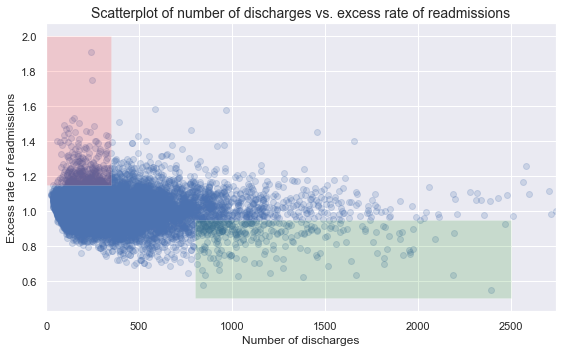

In [6]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

In [7]:
# create dataframe of data used in analysis
data = clean_hospital_read_df[['Number of Discharges', 'Excess Readmission Ratio', 
                              'Predicted Readmission Rate', 'Expected Readmission Rate',
                              'Number of Readmissions']][81:-3].reset_index(drop=True).copy()

# create column for estimated size of the hospital
data['Estimate Size'] = ''

for i,val in enumerate(data['Number of Discharges']):
    if  val < 100:
        data.loc[i, 'Estimate Size'] = 'small'
    elif val > 1000:
        data.loc[i, 'Estimate Size'] = 'large'
    else:
        data.loc[i, 'Estimate Size'] = 'medium'
        
data.sample(5)

,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Estimate Size
5398,265,0.8858,14.0,15.8,30.0,medium
1574,112,1.0846,26.0,23.9,34.0,medium
1198,100,0.9553,16.7,17.5,14.0,medium
5711,280,0.9219,16.4,17.8,41.0,medium
6391,314,1.1473,5.9,5.1,21.0,medium


In [8]:
# calculate sample statistics
mean_read = np.mean(data['Excess Readmission Ratio'])
std_read = np.std(data['Excess Readmission Ratio'])

In [9]:
# create dataframes based on estimated size
small = data[data['Estimate Size'] == 'small']
med = data[data['Estimate Size'] == 'medium']
lrg = data[data['Estimate Size'] == 'large']

# compute counts
n = len(data)
n_sm = len(small)
n_med = len(med)
n_lrg = len(lrg)

print('No. of Facilities by Estimated Size')
print(' Small:', n_sm, '\n Medium:', n_med, '\n Large:', n_lrg)

No. of Facilities by Estimated Size
 Small: 1188 
 Medium: 9846 
 Large: 460


In [10]:
# calculate the number of readmision ratios over 1.0
high = np.sum(data['Excess Readmission Ratio'] > 1.0)
sm_high = np.sum(small['Excess Readmission Ratio'] > 1.0)
lrg_high = np.sum(lrg['Excess Readmission Ratio'] > 1.0)

# calculate the percentage of facility with high readmissions ratios
pct_high = high / n
pct_sm_high = sm_high / n_sm
pct_lrg_high = lrg_high / n_lrg

# calculate the mean readmision ratio
mean = np.mean(data['Excess Readmission Ratio'])
mean_sm = np.mean(small['Excess Readmission Ratio'])
mean_lrg = np.mean(lrg['Excess Readmission Ratio'])

print('All Facilities')
print('Mean excess readmission ratio:{0:.3f}\nPercent with excess readmission rate greater than 1: {1:.2f}%'.format(mean, pct_high*100))
print('-'*100)
print('Small Facilities')
print('Mean excess readmission ratio: {0:.3f}\nPercent with excess readmission rate greater than 1: {1:.2f}%'.format(mean_sm, pct_sm_high*100))
print('-'*100)
print('Large Facilities')
print('Mean excess readmission ratio: {0:.3f}\nPercent with excess readmission rate greater than 1: {1:.2f}%'.format(mean_lrg, pct_lrg_high*100))

All Facilities
Mean excess readmission ratio:1.008
Percent with excess readmission rate greater than 1: 51.66%
----------------------------------------------------------------------------------------------------
Small Facilities
Mean excess readmission ratio: 1.023
Percent with excess readmission rate greater than 1: 63.22%
----------------------------------------------------------------------------------------------------
Large Facilities
Mean excess readmission ratio: 0.979
Percent with excess readmission rate greater than 1: 44.57%


### Setup an appropriate hypothesis test
**H<sub>0</sub>**: There is no relationship between number of discharges and excess readmission ratios.<br />
$\alpha$ = 0.01

First, we will test this hypothesis by examining if there is a significant difference in the means of facilities with large and small number of discharges as compared to the sample mean.

We will then test the hypothesis with a second method by using a regression line and Pearson's r to examine if there is a linear relationship bewteen the number of discharges and excess readmission ratios. We wil then use pairs bootstrap to test the null hypothesis.

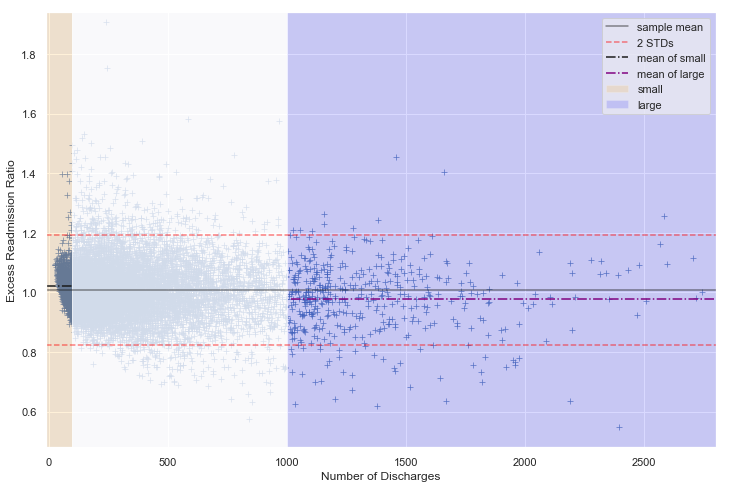

In [11]:
plt.figure(figsize=(12,8))

ax1 = sns.scatterplot(x='Number of Discharges', y='Excess Readmission Ratio', data=data, 
                      marker='+', alpha=0.8, edgecolor='None')
ax1 = plt.axhline(y=mean_read, color='k', alpha=0.5, label='sample mean')
ax1 = plt.axhline(y=mean_read+2*std_read, color='red', alpha=0.5, linestyle='--', label='2 STDs')
ax1 = plt.axhline(y=mean_read-2*std_read, color='red', linestyle='--', alpha=0.5)
ax1 = plt.axhline(y=mean_sm, xmin=0, xmax=.039, color='k', linestyle='-.', label='mean of small')
ax1 = plt.axhline(y=mean_lrg, xmin=0.365, xmax=1, color='purple', linestyle='-.', label='mean of large')
plt.fill_between([-10,100], 0.48, 1.94, facecolor='orange', alpha = .15, interpolate=True, label='small')
plt.fill_between([100,1000], 0.48, 1.94, facecolor='white', alpha= 0.75, interpolate=False)
plt.fill_between([1000,2800], 0.48, 1.94, facecolor='blue', alpha = .15, interpolate=True, label='large')
plt.margins(0.0,0.0)
ax1 = plt.legend()
plt.savefig('img/scatterplot_w_means.png')

In [12]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x,y

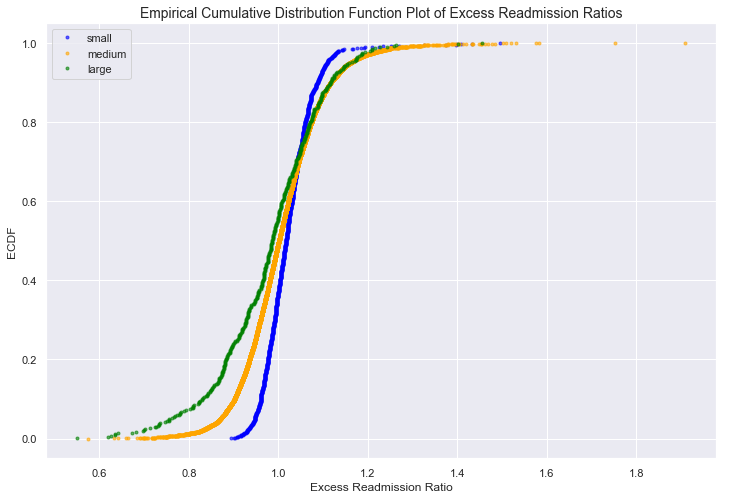

In [13]:
x_s, y_s = ecdf(small['Excess Readmission Ratio'])
x_m, y_m = ecdf(med['Excess Readmission Ratio'])
x_l, y_l = ecdf(lrg['Excess Readmission Ratio'])

# plot ECDFs
plt.figure(figsize=(12,8))
ax2 = plt.plot(x_s, y_s, label='small', color='blue', marker='.', linestyle='None', alpha=0.6)
ax2 = plt.plot(x_m, y_m, label='medium', color='orange', marker='.', linestyle='None', alpha=0.6)
ax2 = plt.plot(x_l, y_l, label='large', color='green', marker='.', linestyle='None', alpha=0.6)
ax2 = plt.title('Empirical Cumulative Distribution Function Plot of Excess Readmission Ratios', fontsize=14)
ax2 = plt.xlabel('Excess Readmission Ratio')
ax2 = plt.ylabel('ECDF')
ax2 = plt.legend()

C:\Users\echri\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


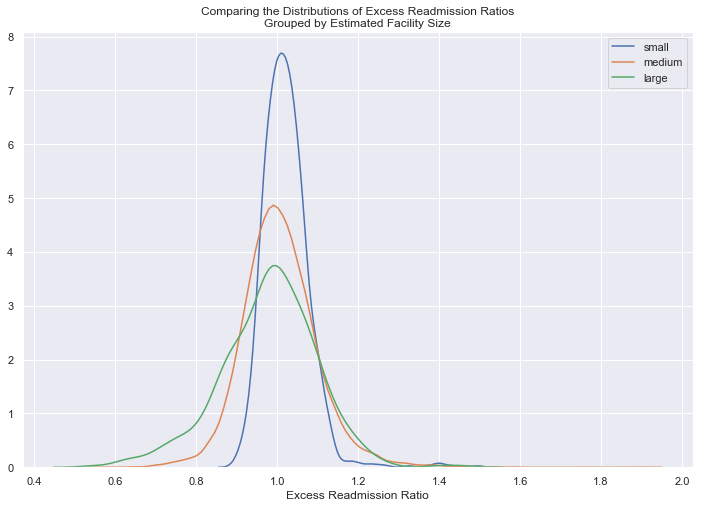

In [14]:
plt.figure(figsize=(12,8))
ax2 = sns.distplot(small['Excess Readmission Ratio'], hist=False, label='small')
sns.distplot(med['Excess Readmission Ratio'],hist=False, label='medium', ax=ax2)
sns.distplot(lrg['Excess Readmission Ratio'],hist=False, label='large', ax=ax2)
plt.title('Comparing the Distributions of Excess Readmission Ratios\nGrouped by Estimated Facility Size')
ax2 = plt.legend()

In [15]:
# create bootstrap function
def bootstrap_replicates(data, func=np.mean):
    '''
    A function to take a random sample with replacement
    from the original data array and return a sample
    test statistic.
    
    data = array of original data
    func = test statistic, defaults to mean
    '''
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

# create empty array for bootstrapping
bs_replicates = np.empty(10000)
bs_small = np.empty(10000)
bs_large = np.empty(10000)
bs_med = np.empty(10000)

# bootstrap 100,000 replicate sample means
for i in range(10000):
    bs_replicates[i] = bootstrap_replicates(data=data['Excess Readmission Ratio'])
    bs_small[i] = bootstrap_replicates(small['Excess Readmission Ratio'])
    bs_med[i] = bootstrap_replicates(med['Excess Readmission Ratio'])
    bs_large[i] = bootstrap_replicates(lrg['Excess Readmission Ratio'])

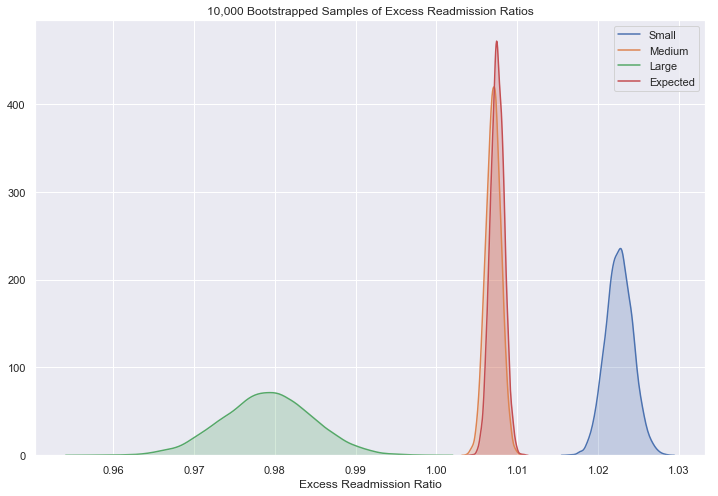

In [16]:
# draw a PDF of the sample means
plt.figure(figsize=(12,8))
ax3 = sns.distplot(bs_small, label='Small', hist=False, kde_kws={"shade": True})
sns.distplot(bs_med, label='Medium', hist=False, kde_kws={"shade": True}, ax=ax3)
sns.distplot(bs_large, label='Large', hist=False, kde_kws={"shade": True}, ax=ax3)
sns.distplot(bs_replicates, label='Expected', hist=False, kde_kws={"shade": True}, ax=ax3)
ax3 = plt.xlabel('Excess Readmission Ratio')
ax3 = plt.title('10,000 Bootstrapped Samples of Excess Readmission Ratios')
ax3 = plt.legend()

In [17]:
# calculate 95% confidence interval
np.percentile(bs_replicates, [2.5,97.5])

array([1.00591366, 1.00922499])

### Compute and report the observed significance value (or p-value)

In [190]:
# calculate sample statistics
# calculate the z-score for large facility mean
diff_lrg = mean_lrg - mean_read
z_lrg = diff_lrg / std_read

# calculate the z-score for small facility mean
diff_sm = mean_sm - mean_read
z_sm = diff_sm / std_read

# calculate p-values
pval_lrg = stats.norm.cdf(z_lrg)
pval_sm = stats.norm.cdf(z_sm)

print('Sample Inference')
print('  z-score of small facilities = {0:.4f} (p = {1:.4f}) \ 
      \n  z-score of large facilities = {2:.4f} (p = {3:.4f})'.format(z_sm
                                                                      , pval_sm
                                                                      , z_lrg
                                                                      , pval_lrg
                                                                     ))

# calculate bootstrap statistics
# calculate the z-score for large facility mean
theta_bs = np.std(bs_replicates) / np.sqrt(n)
diff_lrg_bs = np.mean(bs_large) - np.mean(bs_replicates)
z_lrg_bs = diff_lrg_bs / theta_bs

# calculate z-score for small facility mean
diff_sm_bs = np.mean(bs_small) - np.mean(bs_replicates)
z_sm_bs = diff_sm_bs / theta_bs

# calculate p-values
pval_lrg_bs = stats.norm.cdf(z_lrg_bs)
pval_sm_bs = stats.norm.cdf(1-z_sm_bs)

print('='*50)
print('Bootstrap Inference')
print('  z-score of small facilities = {0:.4f} (p = {1:.4f})\n  z-score of large facilities = {2:.4f} (p = {3:.4f})'.format(z_sm_bs, pval_sm_bs, z_lrg_bs, pval_lrg_bs))


Sample Inference
  z-score of small facilities = 0.1640 (p = 0.5652)
  z-score of large facilities = -0.3097 (p = 0.3784)
Bootstrap Inference
  z-score of small facilities = 1898.9521 (p = 0.0000)
  z-score of large facilities = -3578.1115 (p = 0.0000)


In [19]:
# calculate difference of mean between large and small facilities
diff = mean_lrg - mean_sm

# calculate the z-score for difference of means

z = diff / np.sqrt( (np.var(small['Excess Readmission Ratio']) / n_sm) + (np.var(lrg['Excess Readmission Ratio']) / n_lrg))

# calculate p-values
pval = stats.norm.cdf(z)

print('Sample Inference between Large and Small Facilities')
print('  z-score = {0:.4f} (p = {1:.4f})'.format(z, pval))

Sample Inference between Large and Small Facilities
  z-score = -7.4978 (p = 0.0000)


In [82]:
# compute difference in means
diff = abs(mean_sm - mean_lrg)

# compute Cohen's d
def cohen_d(x,y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (np.mean(x) - np.mean(y)) / np.sqrt(((nx-1)*np.std(x, ddof=1) ** 2 + (ny-1)*np.std(y, ddof=1) ** 2) / dof)

d = cohen_d(small['Excess Readmission Ratio'], lrg['Excess Readmission Ratio'])

print('Measuring Effect Size')
print('On average, the small and large facilities have a difference in excess readmission ratios of {0:.4f} (d = {1:.4f}).'.format(diff, d))

Measuring Effect Size
On average, the small and large facilities have a difference in excess readmission ratios of 0.0435 (d = 0.5445).


In [145]:
# calculate Pearson's r
r, pval = stats.pearsonr(data['Number of Discharges'], data['Excess Readmission Ratio'])
print('r: {0:.4f}\np-value: {1:.4f}'.format(r, pval))

r: -0.0931
p-value: 0.0000


In [177]:
# pairs bootstrap discharges and readmisions
def draw_bs_pairs_linreg(x, y, size=1):
    inds = np.arange(len(x))
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)
    bs_r = np.empty(size)
    bs_pval = np.empty(size)
    bs_r2 = np.empty(size)
    
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)
        bs_r[i], bs_pval[i] = stats.pearsonr(x[bs_inds], y[bs_inds])
        bs_r2[i] = bs_r[i]**2
    return bs_slope_reps, bs_intercept_reps, bs_r, bs_pval, bs_r2

bs_slopes, bs_ints, bs_r, bs_pval, bs_r2 = draw_bs_pairs_linreg(x=data['Number of Discharges'], y=data['Excess Readmission Ratio'], size=10000)

In [184]:
ci_99 = np.percentile(bs_slopes, [0.5, 99.5])
mean_slope = np.mean(bs_slopes)
print('99% Confidence Interval for Slope: ({0:.5f},{1:.5f})\nMean slope:{2:.5f}'.format(ci_95[0], ci_95[1], mean_slope))
print('-'*100)
r_ci_99 = np.percentile(bs_r, [0.5, 99.5])
mean_pearson = np.mean(bs_r)       
print('99% Confidence Interval for Pearson-r: ({0:.5f},{1:.5f})\nMean Pearson-r:{2:.5f}'.format(r_ci_99[0], r_ci_99[1], mean_pearson))
print('-'*100)
r2_ci_99 = np.percentile(bs_r2, [0.5, 99.5])
print('99% Confidence Interval for r\u00b2: ({0:.5f}, {1:.5f})'.format(r2_ci_99[0], r2_ci_99[1]))

99% Confidence Interval for Slope: (-0.00004,-0.00002)
Mean slope:-0.00003
----------------------------------------------------------------------------------------------------
99% Confidence Interval for Pearson-r: (-0.12250,-0.06398)
Mean Pearson-r:-0.09285
----------------------------------------------------------------------------------------------------
99% Confidence Interval for r²: (0.00409, 0.01501)


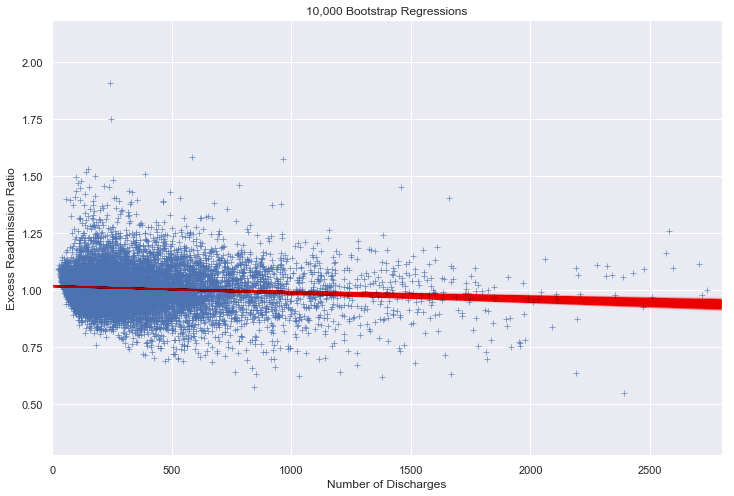

In [157]:
x = np.array([0,2800])

plt.figure(figsize=(12,8))
_ = sns.scatterplot(x='Number of Discharges', y='Excess Readmission Ratio', data=data, 
                      marker='+', alpha=0.8, edgecolor='None')
for i in range(10000):
    _ = plt.plot(x, bs_slopes[i] * x + bs_ints[i], linewidth=0.5, alpha=0.02, color='red')
plt.ylabel('Excess Readmission Ratio')
plt.xlabel('Number of Discharges')
plt.title('10,000 Pairs Bootstrap Regressions')
plt.margins(0,0.2)
plt.show()

### Report statistical significance for  𝛼  = .01.

The p-value was computed for two statistics using three methods in order to examine the validity of the null hypothesis. We start by examining the diffference of mean excess readmission rates of small and large facilities compared to the sample mean. For the mean of small facilities, we find a p-value of 0.5652, and 0.3784 for large facilities. Both of these probabilities fall well above our significance value of 0.1. Therefore we fail to reject the null hypothesis.

However, if we use the sample to create 10,000 bootstrap samples, we can see that while our subgroup means don't change, they become more tightly defined and lose a lot of the variance within each group. The p-values for the bootstrap samples of small and large facilities now both fall below 0.0000. Using bootstrap statistics, we would now reject the null hypothesis that there is no difference in the means excess readmission rate of large and small facilities.

For the second method, we can use Cohen's d tto estimate the effect size of the difference in means between small and large facilities. On average, there is a difference in excess readmission ratios of 0.0435 (d = 0.5445). This implies that there is a moderate effect in the difference. This does not help us to reject or fail to reject the null hypothesis, but it does give us enough evidence to move forward with the belief that we may reject the null hypothesis.

Finally, we can use a pairs bootstrap linear regression to test the null hypothesis using the correlation coeffecient. The sample data provides a Pearson's r of -0.0931, indicating a slightly negative correlation between increasing size and increasing excess readmission rates. If the null hypothesis is true, then we would expect to see the coefficient to be equal to 0.0 somewhere in our 99% confidence interval. To test this, we use the sample data to create 10,000 bootstrap samples of slope and Pearson's r. Doing so, we find 99% confidence intervals for the slope between -0.00004 and -0.00002 and for Pearson's r between -0.12250 and -0.06398. Although these are not strong correlation markers, we must reject the null hypothesis since neither contain 0.0. If we use the bootstrap statistics to calculate r², we get a confidence interval between 0.00409 and 0.01501, which can be interpreted to mean that between 0.4% and 1.5% of the variability in excess readmission ratios can be explained by the number of discharges (or rough estimate of facility size). 

### Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
While the tests rejecting the null hypothesis are statistically significant, this does not mean that they are practically significant. The r² and Cohen's d values indicate that the number of discharges has a small effect on the variability in excess readmission ratios. As recommended, it may be worth requiring smaller facilities to demonstrate upgraded resource allocation in order to improve their excess readmission ratios. However, further research should be done to find additional covariants that are contributing to the variance in excess readmissions rates. Directives and incentives made to hospitals should be tested for effectiveness.

However, the call to consolidate smaller hospitals does not seem practical as this may drastically increase the travel time for patients. Doing could have negative implications on patient access to healthcare and health outcomes. Given the small effect size of the number of discharges, it seems more likely that other covariants may be more highly correlated excess readmissions ratios.

### Look at the scatterplot above.
* What are the advantages and disadvantages of using this plot to convey information?
* Construct another plot that conveys the same information in a more direct manner.

The benefits of this scatter plot are that it allows the viewer to see the areas where the excess readmissions ratios are abnormally high or low in relation to the number of discharges. The problem is that highlighting these two area may give a false impression of the intensity of the linear relationship between these two variables. Furthermore, there are so many points clustering around the mean that they get lost, possibly giving a false sense of the impact of the relatively few cases outside of the norm. 

A similar plot that may be slightly less deceiving is the following scatterplot that segments the datapoints by size and provides their respect means. Here you can see that there does appear to be a slight difference in the means without overstating the difference. 

![scatter plot with means](img/scatterplot_w_means.png)

Another scatter plot that is useful in showing the linear relationship (albeit slight) is the bootstrap plot above. This gives a stronger sense of the relationship by showing the 99% confidence interval of the slope. 